In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import pingouin as pg

%matplotlib inline

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
n = 5

In [3]:
m = math.factorial(n) / math.factorial(2) / math.factorial(n-2)  

In [4]:
m

10.0

In [5]:
# 3 Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [6]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson5/5_task_1.csv')
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson5/5_task_2.csv')

In [7]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [12]:
df1['group'].unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
groupA = df1.query('group == "A"').events
groupB = df1.query('group == "B"').events
groupC = df1.query('group == "C"').events

In [28]:
stats.levene(groupA, groupB, groupC)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
# 4 Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке
# Дополнительно: сравните  результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [20]:
df1.shape

(30000, 3)

In [29]:
pg.normality(data=df1, dv="events", 
                   group="group", method="normaltest")

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


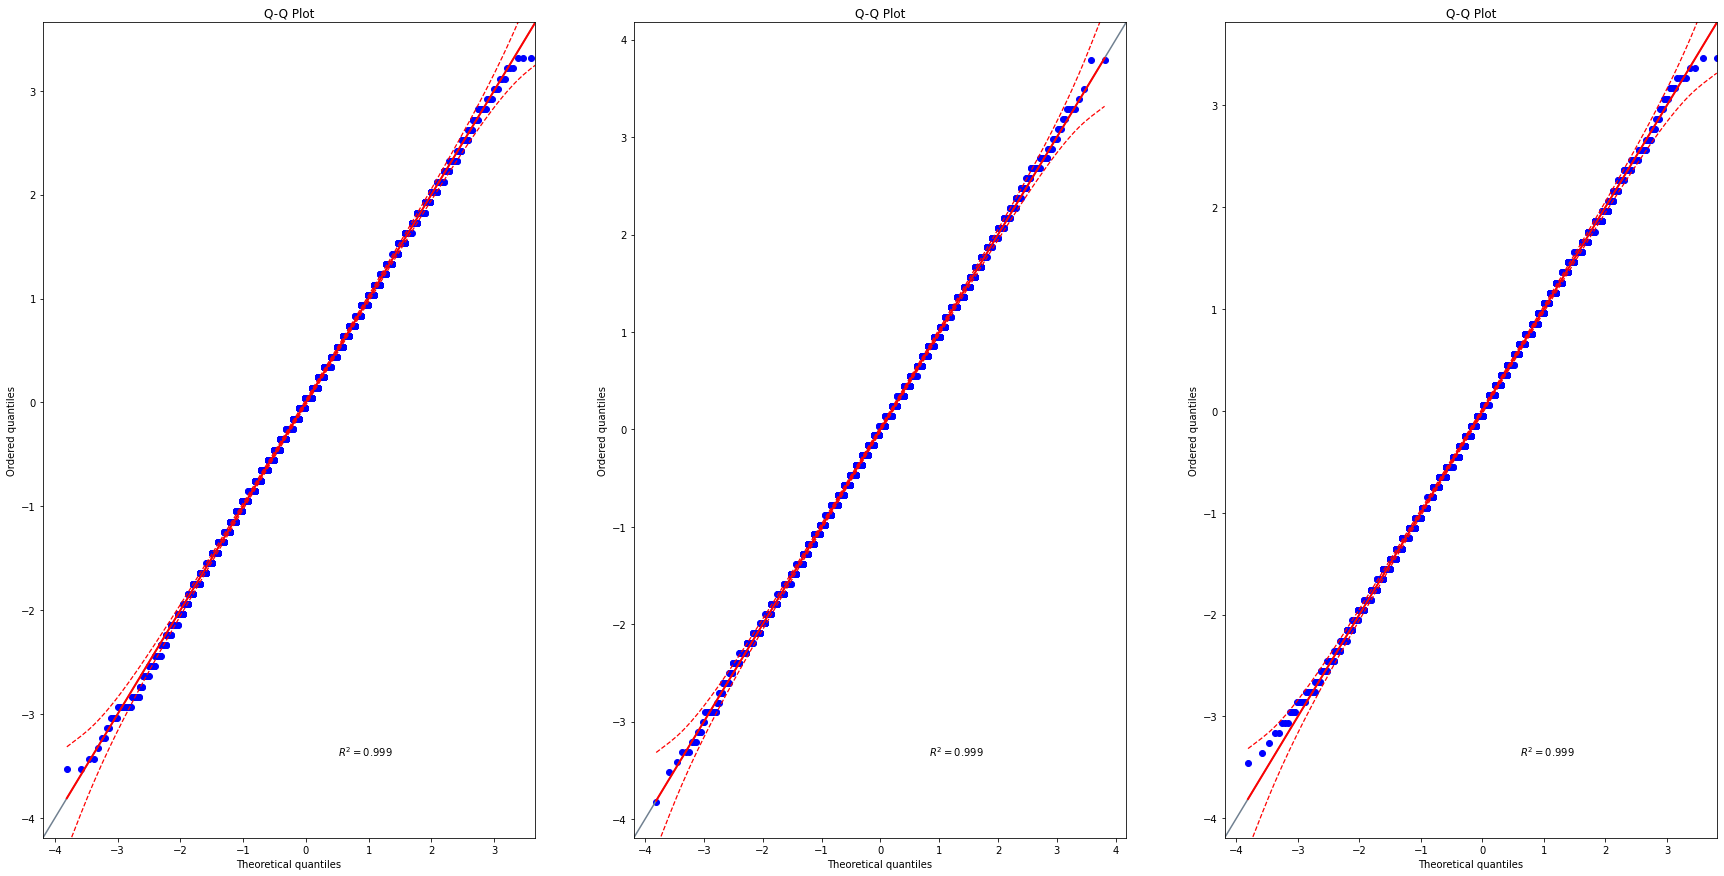

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 15))
ax1 = pg.qqplot(groupA, dist='norm', ax=ax1)
ax2 = pg.qqplot(groupB, dist='norm', ax=ax2)
ax3 = pg.qqplot(groupC, dist='norm', ax=ax3)

In [ ]:
# 5 Самое время провести тест! 

In [49]:
pg.anova(data=df1, dv="events", between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [ ]:
# 6 Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [53]:
data = df1.events

In [54]:
group = df1.group

In [56]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

print(pairwise_tukeyhsd(data, group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [59]:
pg.pairwise_tukey(data=df1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [ ]:
# 8 Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, 
# с разбивкой по сегменту клиента.

# Какой метод скорее всего пригодится в данном случае?

In [60]:
df2.shape

(100000, 4)

In [61]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [62]:
test = df2.query('group == "test"')

In [63]:
control = df2.query('group == "control"')

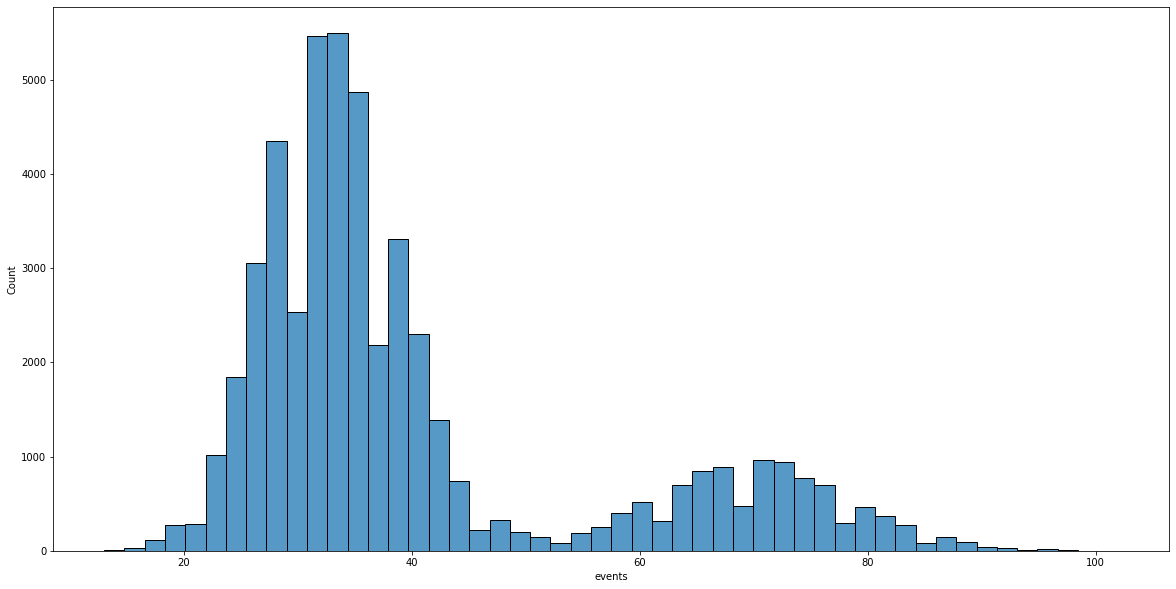

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = test, x = 'events', bins = 50)

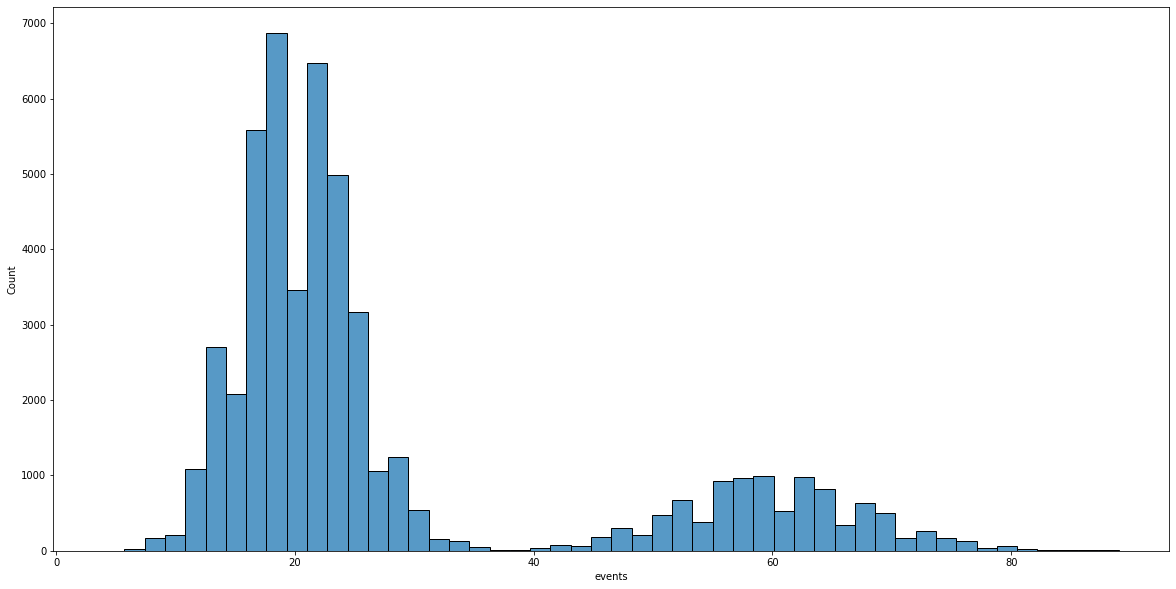

In [74]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = control, x = 'events', bins = 50)

In [ ]:
# 10 Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

# В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, 
# с точностью до 2 знаков после точки.

In [76]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [77]:
df2.groupby(['group', 'segment']).describe()

id                                                     \
                   count        mean           std   min       25%      50%   
group   segment                                                               
control high     10000.0  50473.9782  28761.438914  10.0  25612.50  51031.0   
        low      40000.0  49935.2567  28855.849243   0.0  25022.25  49944.5   
test    high     10000.0  50126.6206  28821.133487  14.0  25317.50  50234.5   
        low      40000.0  49913.3436  28917.383492   1.0  24763.75  49706.5   

                                     events                                   \
                      75%      max    count       mean       std   min   25%   
group   segment                                                                
control high     75261.25  99976.0  10000.0  59.970800  7.805347  31.0  55.0   
        low      74874.25  99999.0  40000.0  20.031575  4.473576   4.0  17.0   
test    high     74783.25  99996.0  10000.0  69.938500  8.403974  40.0  64.0   
        low      75127.25  99995.0  40000.0  33.025925  5.720845  13.0  29.0   

                                    
                  50%   75%    max  
group   segment                     
control high     60.0  65.0   89.0  
        low      20.0  23.0   41.0  
test    high     70.0  76.0  102.0  
        low      33.0  37.0   59.0

In [ ]:
# 12 Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, 
# чтобы понять между какими группами есть статистически значимые различия.

In [78]:
pg.anova(data=df2, dv="events", between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [81]:
# Создать столбец, содержащий все факторы
df2['combination'] = df2['group'] + '/' + df2['segment']

In [82]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [83]:
pg.pairwise_tukey(data=df2, dv="events", between = 'combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control/high,test/high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control/high,test/low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control/low,test/high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control/low,test/low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test/high,test/low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


In [86]:
data2 = df2.events
group2 = df2.combination

In [87]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

MultiComp = MultiComparison(data2, group2)

print(MultiComp.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


In [88]:
print(pairwise_tukeyhsd(data2, group2)) # тоже самое, просто для примера

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


In [ ]:
# 13 Визуализируйте результаты теста и заполните пропуски:

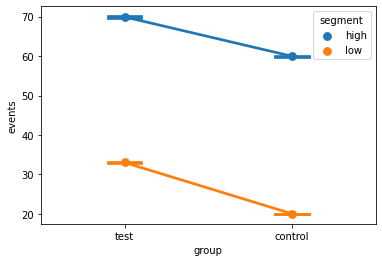

In [91]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df2, capsize = .2)


In [ ]:
# значимость фактора опрелеляем из таблицы. Среднее увеличилрсь, значит выкатываем тестовую кнопку